To resolve the problem of cloud to grid transformation I used the example from  
https://github.com/kylemcdonald/CloudToGrid/blob/master/CloudToGrid.ipynb  
But lap and hungarian didn't work for me/ That's why I used linear_sum_assignment from scipy.optimize

In [2]:
from math import sqrt
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from skimage.transform import resize
import pandas as pd, numpy as np, matplotlib.pyplot as plt

%matplotlib inline

This data is a part of unpublished project where I clusterized the freeky postcards (only coordinates)

In [3]:
df = pd.read_csv('coordinates.csv')
df.head(1)

,ox,oy
0,0.302681,0.61573


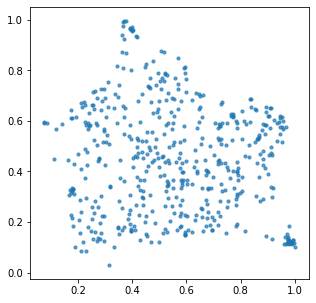

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(x = df['ox'], y = df['oy'], alpha=0.7, s=10)

In [5]:
# sort values

df_sorted = df.sort_values(['oy', 'ox']).to_numpy()

In [6]:
# count how many dots should be in grid line

side = round(sqrt(len(df_sorted)) + 0.5)
side

23

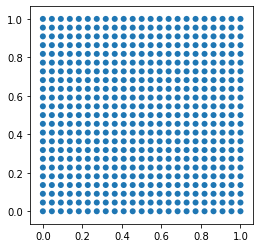

In [7]:
# how the full grid should look like

xv, yv = np.meshgrid(np.linspace(0, 1, side), np.linspace(0, 1, side))
grid = np.dstack((xv, yv)).reshape(-1, 2)

plt.figure(figsize=(4,4))
plt.scatter(grid[:,0], grid[:,1], edgecolors='none', marker='o')
plt.show()

In [8]:
# count distance for each point

cost = cdist(df_sorted, grid, 'sqeuclidean')

In [9]:
# use optimization algorithm 

%time row_ind, col_ind = linear_sum_assignment(cost)

CPU times: user 24.4 s, sys: 2.81 s, total: 27.2 s
Wall time: 29.4 s


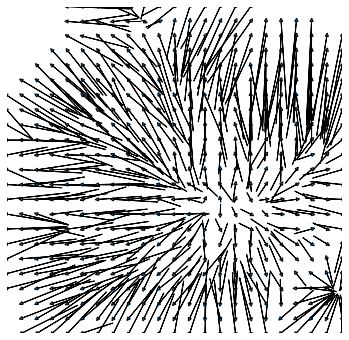

In [10]:
# trahsform cloud to grid

my_grid = grid[col_ind]
plt.figure(figsize=(6, 6))
for start, end in zip(df_sorted, my_grid):
    plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1],
              head_length=0.01, head_width=0.01, width=0.0001)

plt.axis('off')
plt.show()

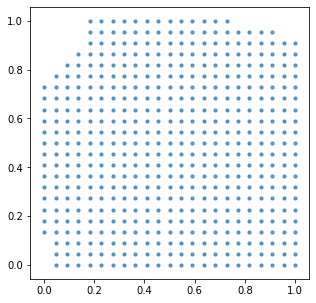

In [11]:
# visualize

plt.figure(figsize=(5, 5))
plt.scatter(my_grid[:,0], my_grid[:,1], alpha=0.7, s=10)

plt.show()